In [129]:
from itertools import compress
import random
import time
import matplotlib.pyplot as plt

from data import *

In [130]:
def initial_population(individual_size, population_size):
    return [[random.choice([True, False]) for _ in range(individual_size)] for _ in range(population_size)]

def fitness(items, knapsack_max_capacity, individual): # Po co jeszcze raz to deklarować?
    total_weight = sum(compress(items['Weight'], individual))
    if total_weight > knapsack_max_capacity:
        return 0
    return sum(compress(items['Value'], individual))

def population_best(items, knapsack_max_capacity, population):
    best_individual = None
    best_individual_fitness = -1
    for individual in population:
        individual_fitness = fitness(items, knapsack_max_capacity, individual)
        if individual_fitness > best_individual_fitness:
            best_individual = individual
            best_individual_fitness = individual_fitness
    return best_individual, best_individual_fitness

# My functions:

## Calculates sum of fitness values in population
def fitnesses(items, knapsack_max_capacity, population):
    fs = []
    for i in population:
        fs.append(fitness(items, knapsack_max_capacity, i))
    return fs

## Array of chances of the roulette wheel selection
def chance_distribution(fitnesses):
    # Each individual from the population contains the starting value of it's "chance zone" at it's index
    distribution = []
    start_pos = 0
    next = 0
    fitness_sum = sum(fitnesses)

    for i in fitnesses:
        chance = i / fitness_sum
        next = chance + start_pos
        distribution.append(next)
        start_pos = next

    return distribution

def choose_individual(chance, roulette):
    index = 0
    
    for i in roulette:
        if chance < i:
            return index
        index += 1

    return len(roulette) - 1    
    

In [131]:
items, knapsack_max_capacity = get_big()
print(items)

               Name  Weight    Value
0               Axe   32252    68674
1       Bronze coin  225790   471010
2             Crown  468164   944620
3    Diamond statue  489494   962094
4      Emerald belt   35384    78344
5            Fossil  265590   579152
6         Gold coin  497911   902698
7            Helmet  800493  1686515
8               Ink  823576  1688691
9         Jewel box  552202  1056157
10            Knife  323618   677562
11       Long sword  382846   833132
12             Mask   44676    99192
13         Necklace  169738   376418
14       Opal badge  610876  1253986
15            Perls  854190  1853562
16           Quiver  671123  1320297
17        Ruby ring  698180  1301637
18  Silver bracelet  446517   859835
19        Timepiece  909620  1677534
20          Uniform  904818  1910501
21     Venom potion  730061  1528646
22       Wool scarf  931932  1827477
23        Cross bow  952360  2068204
24  Yesteryear book  926023  1746556
25         Zinc cup  978724  2100851


In [132]:
population_size = 100
generations = 200
n_selection = 20
n_elite = 1

start_time = time.time()
best_solution = None
best_fitness = 0
population_history = []
best_history = []
population = initial_population(len(items), population_size)

In [133]:
for _ in range(generations):
    population_history.append(population)

    # TODO: implement genetic algorithm
    fsum = fitnesses(items, knapsack_max_capacity, population)
    roulette = chance_distribution(fsum) 
    # example of roulette: [0.0, 0.0, 0.04, 0.24, 0.45, 0.69, 0.81, 0.81, 0.82, 0.99, 1.0]

    selected_indexes = set() # set of unique indexes

    for i in range(0, n_selection):
        index = choose_individual(random.randrange(0, 100) / 100, roulette) # index of chosen individual
        selected_indexes.add(index)

    # TODO: tworzenie dzieci
    # TODO: mutacja 
    # TODO: aktualizacja populacji


    best_individual, best_individual_fitness = population_best(items, knapsack_max_capacity, population)
    if best_individual_fitness > best_fitness:
        best_solution = best_individual
        best_fitness = best_individual_fitness
    best_history.append(best_fitness)

In [134]:
end_time = time.time()
total_time = end_time - start_time
print('Best solution:', list(compress(items['Name'], best_solution)))
print('Best solution value:', best_fitness)
print('Time: ', total_time)

Best solution: ['Bronze coin', 'Crown', 'Emerald belt', 'Helmet', 'Ink', 'Long sword', 'Perls', 'Venom potion', 'Cross bow', 'Zinc cup']
Best solution value: 13253575
Time:  0.2467634677886963


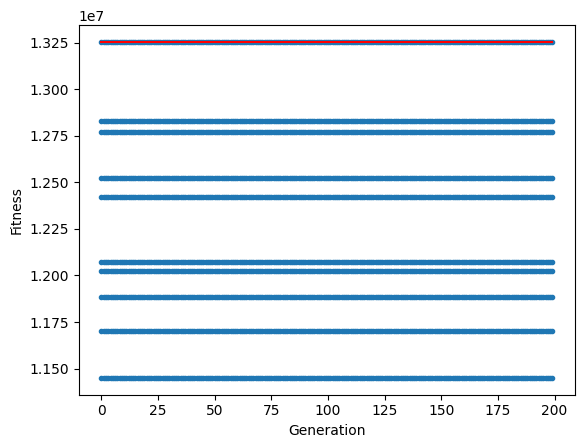

In [135]:
# plot generations
x = []
y = []
top_best = 10
for i, population in enumerate(population_history):
    plotted_individuals = min(len(population), top_best)
    x.extend([i] * plotted_individuals)
    population_fitnesses = [fitness(items, knapsack_max_capacity, individual) for individual in population]
    population_fitnesses.sort(reverse=True)
    y.extend(population_fitnesses[:plotted_individuals])
plt.scatter(x, y, marker='.')
plt.plot(best_history, 'r')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()